In [1]:
    import pandas as pd
    import numpy as np
    import glob
    import matplotlib.pyplot as plt
    %matplotlib inline

    plt.style.use('default') # Make the graphs a bit prettier

    plt.rcParams['figure.figsize'] = (12, 4)

#### Cargar set de datos completo y borrar duplicados

path =r'../data' # use your path

allFiles = glob.glob(path + "/properati-AR*.csv")

allFiles

frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0,low_memory=False)
    
    frame = pd.concat([df,frame])    
    frame.drop_duplicates(inplace=True)

frame.to_csv('../data/properati_full_data')

In [2]:
sell_properati = pd.read_csv('../data/properati_full_data.csv')

/home/brahvic/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,4,5,6,9,17,18,27,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
sell_properati.shape

(2292578, 32)

In [4]:
sell_properati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2292578 entries, 0 to 2292577
Data columns (total 32 columns):
Unnamed: 0                    int64
country_name                  object
created_on                    object
currency                      object
description                   object
expenses                      object
extra                         object
floor                         float64
geonames_id                   float64
id                            object
image_thumbnail               object
lat                           float64
lat-lon                       object
lon                           float64
operation                     object
place_name                    object
place_with_parent_names       object
place_with_parent_names_l1    object
place_with_parent_names_l2    object
price                         float64
price_aprox_local_currency    float64
price_aprox_usd               float64
price_per_m2                  float64
price_usd_per_m2             

#### Columns to drop 


· Unnamed: 0

· extra

· image_thumbnail 


· state_name

· description


· title

· properati_url

· place_with_parent_names_l1

· place_with_parent_names_l2

In [5]:
sell_properati.drop(inplace=True,labels=['Unnamed: 0','extra','image_thumbnail','state_name','description','title','properati_url','place_with_parent_names_l2','place_with_parent_names_l1'],axis=1)

In [6]:
sell_properati.shape

(2292578, 23)

In [7]:
sell_properati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2292578 entries, 0 to 2292577
Data columns (total 23 columns):
country_name                  object
created_on                    object
currency                      object
expenses                      object
floor                         float64
geonames_id                   float64
id                            object
lat                           float64
lat-lon                       object
lon                           float64
operation                     object
place_name                    object
place_with_parent_names       object
price                         float64
price_aprox_local_currency    float64
price_aprox_usd               float64
price_per_m2                  float64
price_usd_per_m2              float64
property_type                 object
rooms                         float64
surface_covered_in_m2         float64
surface_in_m2                 float64
surface_total_in_m2           float64
dtypes: float64(13), ob

In [8]:
sell_properati.place_with_parent_names.count() == sell_properati.shape[0]

True

In [9]:
sell_properati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2292578 entries, 0 to 2292577
Data columns (total 23 columns):
country_name                  object
created_on                    object
currency                      object
expenses                      object
floor                         float64
geonames_id                   float64
id                            object
lat                           float64
lat-lon                       object
lon                           float64
operation                     object
place_name                    object
place_with_parent_names       object
price                         float64
price_aprox_local_currency    float64
price_aprox_usd               float64
price_per_m2                  float64
price_usd_per_m2              float64
property_type                 object
rooms                         float64
surface_covered_in_m2         float64
surface_in_m2                 float64
surface_total_in_m2           float64
dtypes: float64(13), ob

place_with_parents_names es de la foma |country_name|state_name|place_name| 

A continuacion se va a agregar en la columna 'country_name' el pais correspondiente a cada fila

In [10]:

sell_properati.country_name = sell_properati.place_with_parent_names.apply(lambda x : x.split('|')[1])

Unicamente nos interesan los datos de las publicaciones de ventas en argentina

In [11]:
sell_properati = sell_properati[sell_properati['country_name'] == 'Argentina']

In [12]:
sell_properati.shape

(2224380, 23)

In [13]:
sell_properati['state_name'] = sell_properati.place_with_parent_names.apply(lambda x : x.split('|')[2])

In [14]:
sell_properati.state_name.unique() 

array(['Capital Federal', 'Bs.As. G.B.A. Zona Norte',
       'Bs.As. G.B.A. Zona Oeste', 'Buenos Aires Interior', 'Misiones',
       'Buenos Aires Costa Atl\xc3\xa1ntica', 'Bs.As. G.B.A. Zona Sur',
       'Salta', 'Entre R\xc3\xados', 'San Luis', 'Chubut',
       'C\xc3\xb3rdoba', 'Santa Fe', 'Mendoza', 'Tierra Del Fuego',
       'Neuqu\xc3\xa9n', 'La Pampa', 'R\xc3\xado Negro', 'Santa Cruz',
       'Jujuy', 'Tucum\xc3\xa1n', 'Corrientes', 'Formosa', 'Chaco',
       'San Juan', 'Catamarca', 'La Rioja', 'Santiago Del Estero'], dtype=object)

In [15]:
sell_properati = sell_properati[
    (sell_properati['state_name'] == 'Bs.As. G.B.A. Zona Norte' ) |
    (sell_properati['state_name'] == 'Bs.As. G.B.A. Zona Sur' ) |
    (sell_properati['state_name'] == 'Bs.As. G.B.A. Zona Oeste' ) |
    (sell_properati['state_name'] == 'Capital Federal' ) 
    ]

In [16]:
sell_properati.shape

(1615916, 24)

In [17]:
sell_properati.columns

Index([u'country_name', u'created_on', u'currency', u'expenses', u'floor',
       u'geonames_id', u'id', u'lat', u'lat-lon', u'lon', u'operation',
       u'place_name', u'place_with_parent_names', u'price',
       u'price_aprox_local_currency', u'price_aprox_usd', u'price_per_m2',
       u'price_usd_per_m2', u'property_type', u'rooms',
       u'surface_covered_in_m2', u'surface_in_m2', u'surface_total_in_m2',
       u'state_name'],
      dtype='object')

In [18]:
len(sell_properati.place_name.unique())

650

In [19]:
sell_properati['zone'] = sell_properati.place_with_parent_names.apply(lambda x : x.split('|')[3])

In [20]:
len(sell_properati.zone.unique())

92

In [21]:
sell_properati.count()

country_name                  1615916
created_on                    1615916
currency                      1459592
expenses                        89919
floor                          286344
geonames_id                   1316102
id                             512753
lat                           1239043
lat-lon                       1239043
lon                           1239032
operation                     1615916
place_name                    1615807
place_with_parent_names       1615916
price                         1464512
price_aprox_local_currency    1464510
price_aprox_usd               1464510
price_per_m2                   481967
price_usd_per_m2              1040562
property_type                 1615916
rooms                          971481
surface_covered_in_m2          527030
surface_in_m2                  756907
surface_total_in_m2            435122
state_name                    1615916
zone                          1615916
dtype: int64

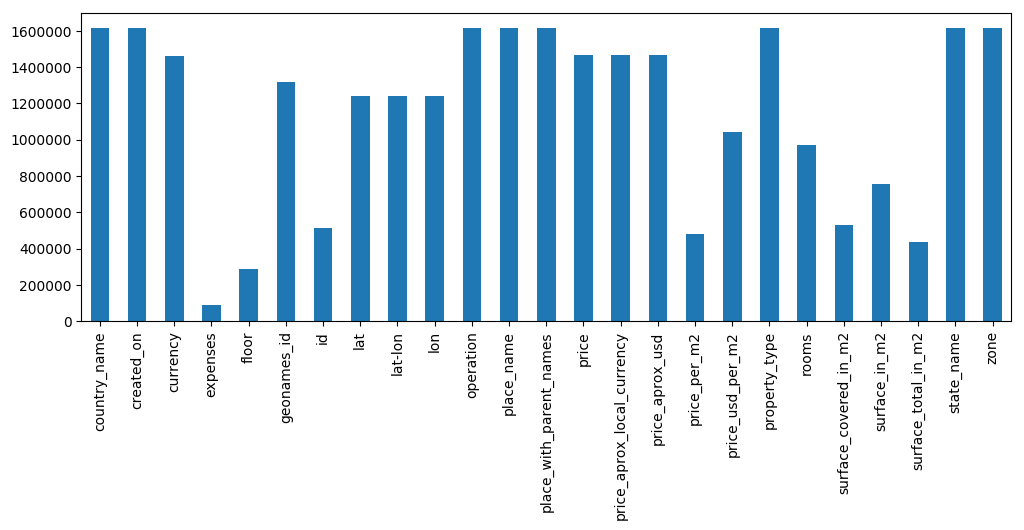

In [22]:
sell_properati.count().plot(kind='bar')

Visualizacion que sirve como guia para ver cuales son los valores que habria que corregir para completar la informacion.

In [23]:
sell_properati[(pd.isnull(sell_properati['place_name']))].zone.unique()

array(['Tigre'], dtype=object)

#### Las propiedades del tigre son las unicas que no contienen informacion en 'place_name'

In [24]:
sell_properati['place_name'] = sell_properati.place_name.apply(lambda x : x if pd.notnull(x) else 'Tigre' )

In [25]:
sell_properati.place_name.count()

1615916

In [26]:
sell_properati['created_on'] = sell_properati['created_on'].apply(lambda x : pd.to_datetime(x))

In [27]:
sell_properati['price'] = sell_properati.price.apply(lambda x : int(x) if pd.notnull(x) else -1  )

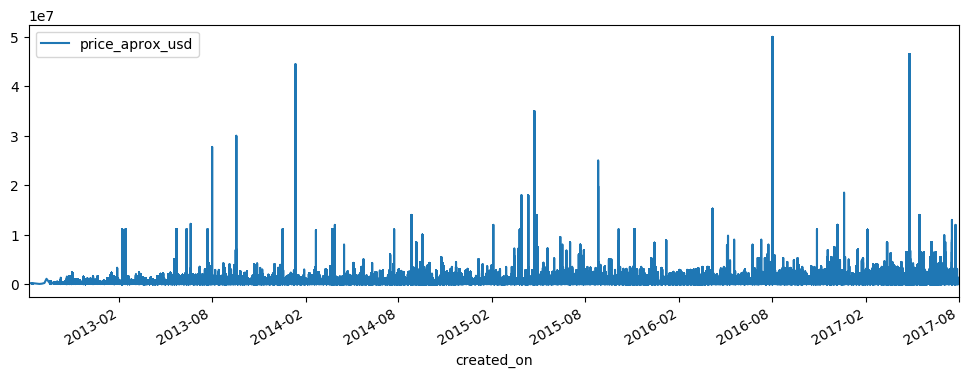

In [28]:
sell_properati[sell_properati['price'] > 0 ].plot(x='created_on',y='price_aprox_usd')

In [29]:

sell_properati['year'] = sell_properati.created_on.apply(lambda x : x.year)

In [30]:
sell_properati.year.unique()

array([2012, 2013, 2014, 2016, 2017, 2015])

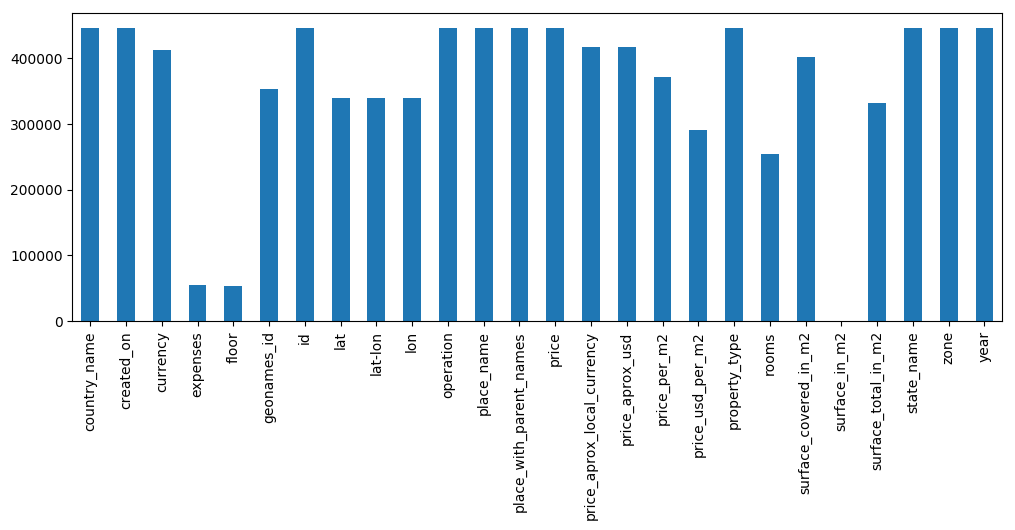

In [31]:
sell_properati[((sell_properati['year']  == 2016) | (sell_properati['year']  == 2017))].count().plot(kind='bar')

In [32]:
sell_properati[((sell_properati['year']  == 2016) | (sell_properati['year']  == 2017))].groupby('id').count()

,country_name,created_on,currency,expenses,floor,geonames_id,lat,lat-lon,lon,operation,...,price_per_m2,price_usd_per_m2,property_type,rooms,surface_covered_in_m2,surface_in_m2,surface_total_in_m2,state_name,zone,year
id,,,,,,,,,,,,,,,,,,,,,
00007b3a539783802fa99293bb164e9700a030a0,5,5,5,0,0,5,5,5,5,5,...,5,5,5,5,5,0,5,5,5,5
0000ac971fa572b750a53f0fdd6de0039f72e444,1,1,1,0,0,0,0,0,0,1,...,1,0,1,0,1,0,0,1,1,1
0000c2ee5156c9889e0202ce9e7a2186cb07b248,1,1,1,1,0,1,0,0,0,1,...,1,1,1,0,1,0,1,1,1,1
0000df753236a702a33171acc0d5e974cc07cce0,5,5,5,0,0,5,5,5,5,5,...,5,5,5,5,5,0,5,5,5,5
00012a6f7ef1970809ef9f1bfc217b3bd2c543a2,1,1,1,0,0,1,1,1,1,1,...,1,0,1,1,1,0,0,1,1,1
00014ab506cb7b96c6aa008cf5036051cac14f10,3,3,3,0,0,0,0,0,0,3,...,3,3,3,0,3,0,3,3,3,3
00017d3d15471815938b4dae3111027aa1a79dc1,3,3,3,0,0,2,3,3,3,3,...,3,3,3,0,3,0,3,3,3,3
000201ef367c08b8168e24b5d06127a001a88e5e,5,5,5,0,5,0,2,2,2,5,...,5,5,5,0,5,0,5,5,5,5
00020f330f42c20efa305ee946bdadfa15f66f95,1,1,1,0,0,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1


In [33]:
sell_properati.property_type.unique()

array(['apartment', 'house', 'PH', 'store'], dtype=object)

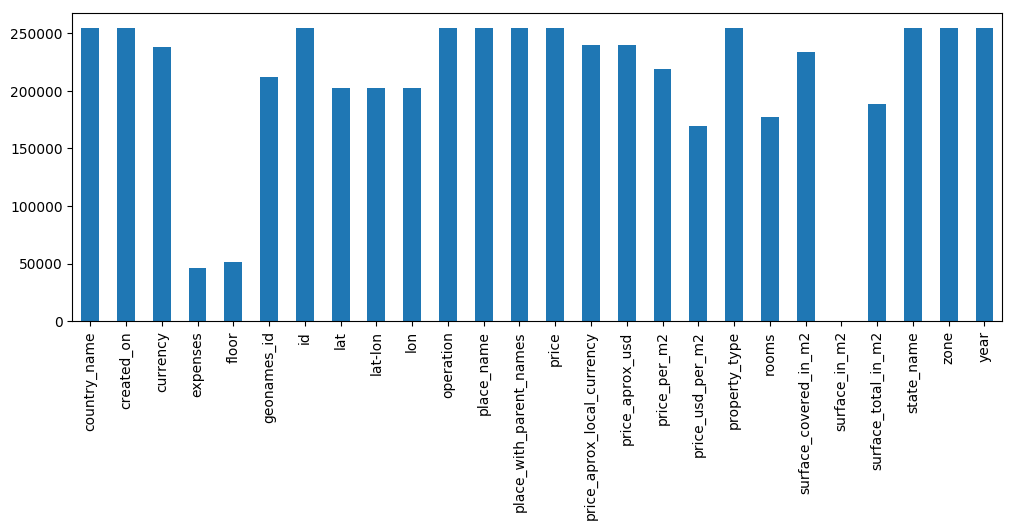

In [34]:
sell_properati[(sell_properati['property_type'] == 'apartment') & \
              ((sell_properati['year']  == 2016) | (sell_properati['year']  == 2017))
              
              ].count().plot(kind='bar')

In [35]:
sell_properati.currency.unique()

array([nan, 'USD', 'ARS', 'BRL', 'PEN'], dtype=object)

In [36]:
mean_m2_usd_zone = sell_properati.drop_duplicates(subset='id')[( (sell_properati['year']  == 2017)) & \
               (sell_properati['state_name'] == 'Capital Federal') & \
               (sell_properati['currency'] == 'USD')
              
              ].groupby('zone')[['price_usd_per_m2']].mean()


/home/brahvic/.local/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


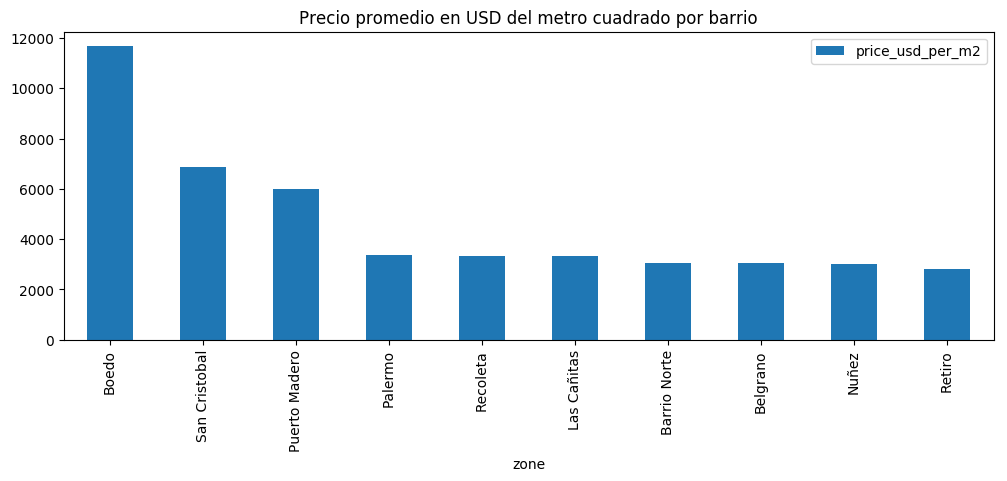

In [37]:
mean_m2_usd_zone.sort_values(by='price_usd_per_m2',ascending=False).head(10).plot(kind='bar',title='Precio promedio en USD del metro cuadrado por barrio')

# ¿ Porque el barrio de Boedo se destaca en el precio en USD promedio por metro cuadrado?

In [47]:
sell_properati.drop_duplicates(subset='id')[((sell_properati['year']  == 2017)) & \
               (sell_properati['state_name'] == 'Capital Federal') & \
               (sell_properati['currency'] == 'USD') & \
               (sell_properati['zone'] == 'Boedo' )  
              ].sort_values(by='price_usd_per_m2',ascending=False)\
               .head(50)[['price_usd_per_m2','lat-lon','price_aprox_usd','surface_total_in_m2','geonames_id']]

/home/brahvic/.local/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,price_usd_per_m2,lat-lon,price_aprox_usd,surface_total_in_m2,geonames_id
453953,206333.333333,"-34.6222039,-58.416089",6809000.0,33.0,3436003.0
453333,173826.066667,NaN,5214782.0,30.0,3436003.0
453493,104486.114286,NaN,3657014.0,35.0,3436003.0
453143,78533.333333,NaN,2356000.0,30.0,3436003.0
452979,34608.000000,NaN,865200.0,25.0,3436003.0
452376,34534.482759,"-34.6266572,-58.4241126",2003000.0,58.0,3436003.0
452273,32486.486487,"-34.6228372,-58.4205095",1202000.0,37.0,3436003.0
453324,25298.666667,NaN,758960.0,30.0,3436003.0
453512,25281.833333,NaN,758455.0,30.0,3436003.0
453674,25280.500000,NaN,758415.0,30.0,3436003.0


In [48]:
sell_properati.geonames_id.unique()

array([ 3436077.,  3427467.,  3435907.,       nan,  3427753.,  3429979.,
        3433918.,  3433910.,  3435257.,  3429595.,  3429244.,  3427500.,
        3427458.,  3430234.,  3430786.,  3429576.,  3433359.,  3430511.,
        3430596.,  3435259.,  3435607.,  3427528.,  6693229.,  3436397.,
        3430291.,  3427407.,  3430787.,  3435359.,  3435874.,  3436109.,
        3429703.,  3427451.,  3430348.,  3430550.,  3428983.,  3435010.,
        3435356.,  3433775.,  3429422.,  3436487.,  3428113.,  3435548.,
        3429153.,  3430570.,  6693228.,  3431333.,  3435506.,  3435087.,
        3427776.,  3436042.,  3433908.,  3433323.,  3429651.,  3428775.,
        3435376.,  3436048.,  3436152.,  3427478.,  3427377.,  3432310.,
        3430310.,  3429053.,  3434130.,  3429088.,  3433522.,  3435024.,
        3427326.,  3428050.,  3436033.,  3433787.,  3433974.,  3429760.,
        3436080.,  3431273.,  3436508.,  3427504.,  3430813.,  3427354.,
        3856531.,  6693230.,  3432039.,  3436003., 

In [ ]:
sell_properati.shape

In [ ]:

sell_properati.drop_duplicates(subset='id').shape